In [65]:
import pandas as pd
import numpy as np

In [66]:
u1 = pd.read_csv('use_log.csv')
cust_m = pd.read_csv('customer_master.csv')
class_m = pd.read_csv('class_master.csv')
camp_m = pd.read_csv('campaign_master.csv')

- use_log : 이용 이력 데이터
- cust_m : 회원정보 데이터 - 탈퇴한 회원을 포함한 모든 회원에 대한 정보(enddate가 비워져있으면 탈퇴하지 않은 회원)
- class_m : 회원구분 데이터 (종일/주간/야간)
- camp_m : 프로모션 행사 구분 데이터(무료/ 반액할인/ 일반권)

In [67]:
display(u1.head(),cust_m.head(),class_m.head(),camp_m.head())

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0


,class,class_name,price
0,C01,0_종일,10500
1,C02,1_주간,7500
2,C03,2_야간,6000


,campaign_id,campaign_name
0,CA1,2_일반
1,CA2,0_입회비반액할인
2,CA3,1_입회비무료


In [68]:
# 고객현황 data인 cust_m에 data를 결합하여 새로운 dataframe 생성
cust_join = pd.merge(cust_m, class_m, on='class', how='left')
cust_join

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000
...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500
4188,HD246549,XXXXX,C01,F,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500
4189,GD037007,XXXXX,C03,M,2019-03-14 00:00:00,NaN,CA1,0,2_야간,6000
4190,OA953150,XXXXX,C01,M,2019-03-14 00:00:00,NaN,CA1,0,0_종일,10500


In [69]:
cust_join = pd.merge(cust_join,camp_m, on='campaign_id', how='left')
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [70]:
# 공통칼럼 기준으로 잘 합쳐졌는지 확인
print(len(cust_m))
print(len(cust_join))

4192
4192


In [71]:
cust_join.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4192 entries, 0 to 4191
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customer_id    4192 non-null   object
 1   name           4192 non-null   object
 2   class          4192 non-null   object
 3   gender         4192 non-null   object
 4   start_date     4192 non-null   object
 5   end_date       1350 non-null   object
 6   campaign_id    4192 non-null   object
 7   is_deleted     4192 non-null   int64 
 8   class_name     4192 non-null   object
 9   price          4192 non-null   int64 
 10  campaign_name  4192 non-null   object
dtypes: int64(2), object(9)
memory usage: 393.0+ KB


In [72]:
cust_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
dtype: int64

- 결측치를 확인하는 이유는 결합할 때 키가 없거나 결합이 잘못되면 자동으로 결측치가 들어가기 때문
    -> 결합 후에는 결측치를 확인해주는게 좋음
- 원래 결측치가 있던 end_date에만 결측치가 있으므로 data가 잘 들어가져있다라고 확인

In [73]:
cust_join['customer_id'].nunique()  # unique값의 수 확인

4192

#### cust_join dataframe 분석

어떤 궁금에 대해 data를 뽑아낼지
- 어떤 종류의 회원이 있는지
- 어떤 캠페인으로 많이 가입했는지
- 언제 가입/탈퇴 회원이 많은지
- 남여 비율
- 탈퇴한 회원들은 얼마큼의 기간동안 스포츠센터를 다녔는지

In [74]:
cust_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaN,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaN,CA1,0,2_야간,6000,2_일반


In [75]:
cust_join.class_name.value_counts()

0_종일    2045
2_야간    1128
1_주간    1019
Name: class_name, dtype: int64

In [76]:
cust_join.groupby('class_name')['customer_id'].count()

class_name
0_종일    2045
1_주간    1019
2_야간    1128
Name: customer_id, dtype: int64

In [77]:
# 회원권 종류별로 비율 확인
round(cust_join.groupby('class_name')['customer_id'].count()*100 / cust_join.shape[0], 1)   # 소수점 처리

class_name
0_종일    48.8
1_주간    24.3
2_야간    26.9
Name: customer_id, dtype: float64

In [78]:
# 프로모션 현황 비율 확인
round(cust_join.groupby('campaign_name')['customer_id'].count()*100 / cust_join.shape[0], 1) 

campaign_name
0_입회비반액할인    15.5
1_입회비무료      11.7
2_일반         72.8
Name: customer_id, dtype: float64

In [79]:
# 성별 현황
print('성별 현황 \n', cust_join.gender.value_counts())
# 성별 비율
print('성별 비율 \n', round(cust_join.groupby('gender')['customer_id'].count()*100 / cust_join.shape[0]), 1)

성별 현황 
 M    2209
F    1983
Name: gender, dtype: int64
성별 비율 
 gender
F    47.0
M    53.0
Name: customer_id, dtype: float64 1


In [80]:
# 탈퇴자 현황
print('탈퇴자 현황 \n', cust_join.is_deleted.value_counts())
# 탈퇴자 비율
print('탈퇴자 비율 \n', round(cust_join.groupby('is_deleted')['customer_id'].count()*100 / cust_join.shape[0]), 1)

탈퇴자 현황 
 0    2842
1    1350
Name: is_deleted, dtype: int64
탈퇴자 비율 
 is_deleted
0    68.0
1    32.0
Name: customer_id, dtype: float64 1


- 남자가 더 많이 가입한 이유??
- 탈퇴한 사람들은 왜 탈퇴?? (프로모션만 이용??)

### data를 조건별로 뽑아보기
최신데이터
 - 2019.3 이용자 뽑기 -> end-data가 2019.3.31 이후거나 탈퇴한 적이 없어야 함

In [81]:
cust_join['end_date'] = pd.to_datetime(cust_join['end_date'])
cust_new = cust_join[(cust_join['end_date']>=pd.to_datetime('20190331'))|(cust_join['end_date'].isnull())]
cust_new.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반


In [82]:
cust_new['end_date'].unique()

array([                          'NaT', '2019-03-31T00:00:00.000000000'],
      dtype='datetime64[ns]')

In [83]:
# 어떤 회원권을 많이 사용하고 있는지 확인
cust_new.groupby('class_name')['customer_id'].count()

class_name
0_종일    1444
1_주간     696
2_야간     813
Name: customer_id, dtype: int64

In [84]:
round((cust_new.groupby('class_name')['customer_id'].count()*100 / cust_new.shape[0]), 1)

class_name
0_종일    48.9
1_주간    23.6
2_야간    27.5
Name: customer_id, dtype: float64

In [85]:
# 성별 비율 확인
round((cust_new.groupby('gender')['customer_id'].count()*100 / cust_new.shape[0]), 1)

gender
F    47.4
M    52.6
Name: customer_id, dtype: float64

In [86]:
# 프로모션 비율 확인
round((cust_new.groupby('campaign_name')['customer_id'].count()*100 / cust_new.shape[0]), 1)

campaign_name
0_입회비반액할인    10.5
1_입회비무료       8.2
2_일반         81.3
Name: customer_id, dtype: float64

<data 분석 해석>
- 회원권과 성별 변수에 대해서는 전체 data에 대해 뽑았던 것과 비율이 크게 다르지 않음
    - 특정 회원권이나 성별이 탈퇴한 것은 아님

- 전체 data에서 프로모션 비율 중 일반 가입이 70%정도인데, 최신 사용자 data에서는 일반 80% : 10%정도 차이
    - 프로모션으로 가입한 사람은 일반 가입한 사람보다 계속 이용할 가능성이 낮을 수 있음

#### 이용이력 데이터

In [87]:
u1.head()

,log_id,customer_id,usedate
0,L00000049012330,AS009373,2018-04-01
1,L00000049012331,AS015315,2018-04-01
2,L00000049012332,AS040841,2018-04-01
3,L00000049012333,AS046594,2018-04-01
4,L00000049012334,AS073285,2018-04-01


회원이 스포츠센터를 이용할 때 시간이 찍히기 때문에 시간적 요소를 분석해 볼 수 있겠다

ex)
- 한달 이용 횟수 변화
- 회원이 스포츠센터를 정기적으로 이용하는지
- 회원들이 월별 이용하는 평균 수치, 최대/최소

In [88]:
u1['usedate'] = pd.to_datetime(u1['usedate'])   # data를 날짜형으로 변환

In [89]:
u1['년월'] = u1['usedate'].dt.strftime('%Y%m')

In [90]:
u1.head()

,log_id,customer_id,usedate,년월
0,L00000049012330,AS009373,2018-04-01,201804
1,L00000049012331,AS015315,2018-04-01,201804
2,L00000049012332,AS040841,2018-04-01,201804
3,L00000049012333,AS046594,2018-04-01,201804
4,L00000049012334,AS073285,2018-04-01,201804


In [91]:
# 월별, 고객 id별 이용횟수 카운트
u1_month = u1.groupby(['년월','customer_id'], as_index=False).count()   # as_index=False : index 새로 지정
u1_month

,년월,customer_id,log_id,usedate
0,201804,AS002855,4,4
1,201804,AS009013,2,2
2,201804,AS009373,3,3
3,201804,AS015315,6,6
4,201804,AS015739,7,7
...,...,...,...,...
36837,201903,TS995853,8,8
36838,201903,TS998593,8,8
36839,201903,TS999079,3,3
36840,201903,TS999231,6,6


In [92]:
u1_month.rename(columns={'log_id':'count'}, inplace=True)
u1_month.drop('usedate', axis=1, inplace=True)
u1_month.head()

,년월,customer_id,count
0,201804,AS002855,4
1,201804,AS009013,2
2,201804,AS009373,3
3,201804,AS015315,6
4,201804,AS015739,7


In [93]:
# 고객별 월평균 사용횟수
u1_cust = u1_month.groupby('customer_id')['count'].agg([np.mean,np.median,np.max,np.min])
u1_cust = u1_cust.reset_index(drop=False)
u1_cust.head()

,customer_id,mean,median,amax,amin
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


#### 정기적으로 스포츠센터 사용하는 고객 확인

- 매주 같은 요일에 왔는지
- 월이나 요일별로 방문한 횟수의 최대값이 4이상인 요일이 하나라도 있으면 정기사용자

In [94]:
# weekday : 월 0 ~ 일 6
u1['weekday'] = u1['usedate'].dt.weekday
u1.head()

,log_id,customer_id,usedate,년월,weekday
0,L00000049012330,AS009373,2018-04-01,201804,6
1,L00000049012331,AS015315,2018-04-01,201804,6
2,L00000049012332,AS040841,2018-04-01,201804,6
3,L00000049012333,AS046594,2018-04-01,201804,6
4,L00000049012334,AS073285,2018-04-01,201804,6


In [95]:
u1_week = u1.groupby(['customer_id','년월', 'weekday'], as_index=False).count() # as_index=False : data 값을 인덱스로 사용하지 않겠다
u1_week

,customer_id,년월,weekday,log_id,usedate
0,AS002855,201804,5,4,4
1,AS002855,201805,2,1,1
2,AS002855,201805,5,4,4
3,AS002855,201806,5,5,5
4,AS002855,201807,1,1,1
...,...,...,...,...,...
93328,TS999855,201901,1,1,1
93329,TS999855,201901,5,4,4
93330,TS999855,201901,6,1,1
93331,TS999855,201902,5,4,4


In [96]:
u1_week.rename(columns={'log_id':'cnt'}, inplace=True)
u1_week

,customer_id,년월,weekday,cnt,usedate
0,AS002855,201804,5,4,4
1,AS002855,201805,2,1,1
2,AS002855,201805,5,4,4
3,AS002855,201806,5,5,5
4,AS002855,201807,1,1,1
...,...,...,...,...,...
93328,TS999855,201901,1,1,1
93329,TS999855,201901,5,4,4
93330,TS999855,201901,6,1,1
93331,TS999855,201902,5,4,4


In [97]:
del u1_week['usedate']
u1_week.head()

,customer_id,년월,weekday,cnt
0,AS002855,201804,5,4
1,AS002855,201805,2,1
2,AS002855,201805,5,4
3,AS002855,201806,5,5
4,AS002855,201807,1,1


u1_week dataframe을 가지고 cnt 4이상이면 1, 아니면 0인 컬럼 만들기

In [98]:
u1_week = u1_week.groupby('customer_id', as_index=False)[['cnt']].max()
u1_week

,customer_id,cnt
0,AS002855,5
1,AS008805,4
2,AS009013,2
3,AS009373,5
4,AS015233,5
...,...,...
4187,TS995853,5
4188,TS998593,5
4189,TS999079,5
4190,TS999231,5


In [99]:
# 방법1 : apply(lambda)
u1_week['flag1'] = u1_week['cnt'].apply(lambda x: 1 if (x>=4) else 0)
u1_week

,customer_id,cnt,flag1
0,AS002855,5,1
1,AS008805,4,1
2,AS009013,2,0
3,AS009373,5,1
4,AS015233,5,1
...,...,...,...
4187,TS995853,5,1
4188,TS998593,5,1
4189,TS999079,5,1
4190,TS999231,5,1


In [100]:
# 방법2 : is_over
u1_week['flag2'] = 0
is_over4 = (u1_week['cnt']>=4)
u1_week.loc[is_over4, 'flag2'] = 1
u1_week

,customer_id,cnt,flag1,flag2
0,AS002855,5,1,1
1,AS008805,4,1,1
2,AS009013,2,0,0
3,AS009373,5,1,1
4,AS015233,5,1,1
...,...,...,...,...
4187,TS995853,5,1,1
4188,TS998593,5,1,1
4189,TS999079,5,1,1
4190,TS999231,5,1,1


In [101]:
# 방법3 : where문
u1_week['flag3'] = 0
u1_week['flag3'] = u1_week['flag3'].where(u1_week['cnt']<4,1)   # 참이면 0, 거짓이면 1
u1_week

,customer_id,cnt,flag1,flag2,flag3
0,AS002855,5,1,1,1
1,AS008805,4,1,1,1
2,AS009013,2,0,0,0
3,AS009373,5,1,1,1
4,AS015233,5,1,1,1
...,...,...,...,...,...
4187,TS995853,5,1,1,1
4188,TS998593,5,1,1,1
4189,TS999079,5,1,1,1
4190,TS999231,5,1,1,1


고객 데이터와 이용이력 데이터 조인

In [102]:
display(cust_join.head(),u1_cust.head(),u1_week.head())

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반


,customer_id,mean,median,amax,amin
0,AS002855,4.500000,5.0,7,2
1,AS008805,4.000000,4.0,8,1
2,AS009013,2.000000,2.0,2,2
3,AS009373,5.083333,5.0,7,3
4,AS015233,7.545455,7.0,11,4


,customer_id,cnt,flag1,flag2,flag3
0,AS002855,5,1,1,1
1,AS008805,4,1,1,1
2,AS009013,2,0,0,0
3,AS009373,5,1,1,1
4,AS015233,5,1,1,1


In [103]:
cust_use_join = pd.merge(cust_join, u1_cust, on='customer_id', how='left')
cust_use_join = pd.merge(cust_use_join, u1_week[['customer_id','flag1']], on='customer_id', how='left')
cust_use_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag1
0,OA832399,XXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1
1,PL270116,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1
2,OA974876,XXXXX,C01,M,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1
3,HD024127,XXXXX,C01,F,2015-05-01 00:00:00,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1
4,HD661448,XXXXX,C03,F,2015-05-01 00:00:00,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1


In [104]:
len(cust_join), len(u1_cust), len(u1_week), len(cust_use_join)

(4192, 4192, 4192, 4192)

In [106]:
cust_use_join.isnull().sum()

customer_id         0
name                0
class               0
gender              0
start_date          0
end_date         2842
campaign_id         0
is_deleted          0
class_name          0
price               0
campaign_name       0
mean                0
median              0
amax                0
amin                0
flag1               0
dtype: int64

#### 회원 기간 계산

In [108]:
cust_use_join['cal_date'] = cust_use_join['end_date']
# end-date가 비워진 경우에는 cal_date에 2019-04-30으로 채워주기
cust_use_join['cal_date'].fillna(pd.to_datetime('20190430'),inplace=True)
cust_use_join['start_date'] = pd.to_datetime(cust_use_join['start_date'])
cust_use_join['end_date'] = pd.to_datetime(cust_use_join['end_date'])
cust_use_join['cal_date'] = pd.to_datetime(cust_use_join['cal_date'])
cust_use_join.head()

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag1,cal_date
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30


In [110]:
cust_use_join['mem_period'] = (cust_use_join['cal_date'] - cust_use_join['start_date']) / np.timedelta64(1,'M')
cust_use_join.head()
# 개월 수

,customer_id,name,class,gender,start_date,end_date,campaign_id,is_deleted,class_name,price,campaign_name,mean,median,amax,amin,flag1,cal_date,mem_period
0,OA832399,XXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,5.0,8,2,1,2019-04-30,47.968131
1,PL270116,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,5.083333,5.0,7,3,1,2019-04-30,47.968131
2,OA974876,XXXXX,C01,M,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.583333,5.0,6,3,1,2019-04-30,47.968131
3,HD024127,XXXXX,C01,F,2015-05-01,NaT,CA1,0,0_종일,10500,2_일반,4.833333,4.5,7,2,1,2019-04-30,47.968131
4,HD661448,XXXXX,C03,F,2015-05-01,NaT,CA1,0,2_야간,6000,2_일반,3.916667,4.0,6,1,1,2019-04-30,47.968131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4187,HD676663,XXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,8.000000,8.0,8,8,0,2019-04-30,1.544180
4188,HD246549,XXXXX,C01,F,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,10.000000,10.0,10,10,0,2019-04-30,1.544180
4189,GD037007,XXXXX,C03,M,2019-03-14,NaT,CA1,0,2_야간,6000,2_일반,8.000000,8.0,8,8,0,2019-04-30,1.544180
4190,OA953150,XXXXX,C01,M,2019-03-14,NaT,CA1,0,0_종일,10500,2_일반,11.000000,11.0,11,11,0,2019-04-30,1.544180


In [111]:
cust_use_join[['mean','median','amax','amin']].describe()

,mean,median,amax,amin
count,4192.000000,4192.000000,4192.000000,4192.000000
mean,5.333127,5.250596,7.823950,3.041269
std,1.777533,1.874874,2.168959,1.951565
min,1.000000,1.000000,1.000000,1.000000
25%,4.250000,4.000000,7.000000,2.000000
50%,5.000000,5.000000,8.000000,3.000000
75%,6.416667,6.500000,9.000000,4.000000
max,12.000000,12.000000,14.000000,12.000000


In [114]:
# 전체 고객 중 정기적으로 스포츠센터를 사용하는 비율
round(cust_use_join.groupby('flag1').count()['customer_id']*100 / cust_use_join.shape[0], 1)

flag1
0    18.6
1    81.4
Name: customer_id, dtype: float64

- flag가 1이면 한달동안 특정요일에 4번이상 스포츠센터를 방문함 -> 정기적으로 이용하는 사람이다(가정)
- 정기적으로 스포츠센터를 이용하는 사람은 81%

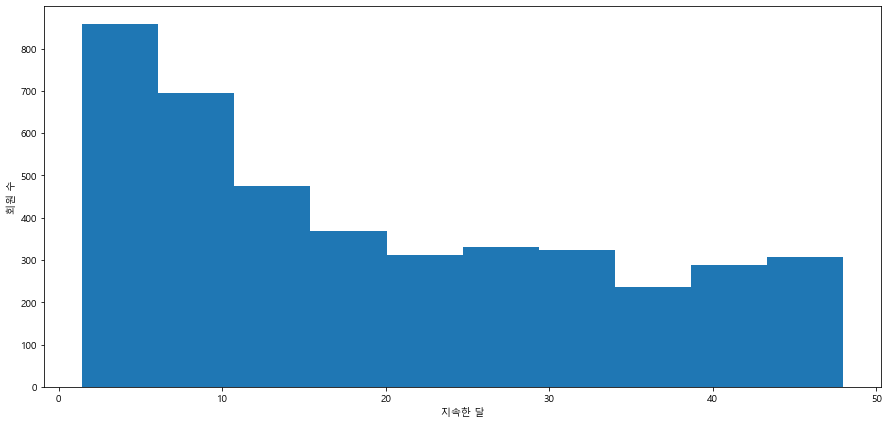

In [118]:
# 전체 회원들 중에서 얼만큼 스포츠 센터를 다녔는지 기간을 뽑아보겠다
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False

plt.figure(figsize=(15,7))
plt.hist(cust_use_join['mem_period'])
plt.xlabel('지속한 달')
plt.ylabel('회원 수')
plt.show()

회원 수가 유지되는 개월수가 가장 많은 기간은 0~10개월 사이이고 10개월 이상다니고 있는 회원 수의 분포는 비슷하네?

- 10개월이 회원을 지속하는 고비일 수 있겠네?
- 1-개월 넘게 다니도록 하려면 어떻게 해야함??

In [119]:
# 탈퇴회원 통계량
cust_use_join[cust_use_join['is_deleted']==1].describe()

,is_deleted,price,mean,median,amax,amin,flag1,mem_period
count,1350.0,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000,1350.000000
mean,1.0,8595.555556,3.865474,3.621852,6.461481,1.821481,0.456296,8.878534
std,0.0,1949.163652,1.246385,1.270847,2.584021,0.976361,0.498271,5.095672
min,1.0,6000.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.445615
25%,1.0,6000.000000,3.000000,3.000000,4.000000,1.000000,0.000000,4.928233
50%,1.0,7500.000000,4.000000,4.000000,7.000000,2.000000,0.000000,7.950882
75%,1.0,10500.000000,4.666667,4.500000,8.000000,2.000000,1.000000,11.959178
max,1.0,10500.000000,9.000000,9.000000,13.000000,8.000000,1.000000,23.951210


In [120]:
# 다니고 있는 회원의 통계량
cust_use_join[cust_use_join['is_deleted']==0].describe()

,is_deleted,price,mean,median,amax,amin,flag1,mem_period
count,2842.0,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000,2842.000000
mean,0.0,8542.927516,6.030288,6.024279,8.471147,3.620690,0.984166,24.840061
std,0.0,1977.189779,1.553587,1.599765,1.571048,2.030488,0.124855,13.827461
min,0.0,6000.000000,3.166667,3.000000,5.000000,1.000000,0.000000,1.511325
25%,0.0,6000.000000,4.833333,5.000000,7.000000,2.000000,1.000000,12.813405
50%,0.0,7500.000000,5.583333,5.500000,8.000000,3.000000,1.000000,24.936857
75%,0.0,10500.000000,7.178030,7.000000,10.000000,5.000000,1.000000,35.943243
max,0.0,10500.000000,12.000000,12.000000,14.000000,12.000000,1.000000,47.968131


In [121]:
cust_use_join.to_csv('customer_join.csv',index=False)